## Timekeeping in Python

### Clocks and timekeeping on computers are not trivial.

* Remember Y2k?  All of that was caused by the representation of 2-digit years in computer systems.

* For many years, all timekeeping on computer systems was referenced to January 1, 1970 because no computer data pre-existed that.  This is known as the POSIX time.

Python has multiple timekeeping modules including base python modules **date**, **time**, **datetime**.  We'll focus on **datetime**.

Note:  Numpy and Pandas also have their own timekeeping, but both are compatible with the base python package of datetime.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time as time
import datetime as dt

In [3]:
# A Datetime object can incorporate Year, Month, Day, Hour, Minute, Second, Millisecond.
# At a minimum, year, month, day must be specified

Da = dt.datetime(
    year=2019,\
    month=12,\
    day=13,\
    second=59
)
print(Da)


# Specify everything in order of Year, Month, Day, Hour, Minute, Second
Db = dt.datetime(2000,12,13,13,55,59)
print(Db)


# Specify less than the minimum
Dc = dt.datetime(2020,12)
print(Da)


2019-12-13 00:00:59
2000-12-13 13:55:59


TypeError: function missing required argument 'day' (pos 3)

Datetime objects support basic arithmetic:

In [4]:
# Subtracting 
Dg = Da-Db
print(Dg)
# Dg is a timedelta object
Dg?
Dg.total_seconds()


# Datetime and timedelta objects can be added and subtracted
print( dt.datetime(1990,10,31)+dt.timedelta(days=33) )
print( dt.datetime(1990,10,31)-Dg )

# This is not permitted, because Db and Da represent absolute time since a referenec.
Df = Db+Da
print(Df)
Df?
Df.total_seconds()



6938 days, 10:05:00
1990-12-03 00:00:00
1971-11-01 13:55:00


TypeError: unsupported operand type(s) for +: 'datetime.datetime' and 'datetime.datetime'

In [6]:
# Datetime provides the current time stamp using now()
t0 = dt.datetime.now()
print(t0)

2020-10-26 16:47:18.268507


### Time references:

* Datetime uses the **proleptic Gregorian** calendar as a reference.  Year 1, is the reference year.  Year 2020 is Year 2020.
* This differs from e.g. the POSIX calendar, which uses 1970 as the reference year.
* Unless specified, the datetime object is **naive**, meaning it doesn't know its time relative to geography.

In [7]:
# Express t0 to total number of elapsed days since January 1, of year 1.
t1 = t0.toordinal()
# t1 is an integer.
print(t1)

# Recover timestamp, but note that hrs,mins,seconds have been lost
print(dt.datetime.fromordinal(t1))

737724
2020-10-26 00:00:00


In [8]:
# Express t0 as total seconds elapsed since January 1, of year 1 (the reference year).
t0.timestamp()   # This value is a float.

1603745238.268507

In [9]:
# Pandas datetime library has similar, but not identical functionality as the base datetime library. 
pd.datetime.now().toordinal()

737724

In [10]:
# Include notes on tzinfo()

# Can add and subtract datetime objects.  These are stored as timedelta()
dt.datetime.now().timestamp()

1603745381.325909

In [14]:
print(t0.tzinfo==None)


# pytz gives the time zone information
import pytz
timezone = pytz.timezone("America/New_York")
ttz = timezone.localize(t0)
print(ttz)  #this prints offset from UTC.


True
2020-10-26 16:47:18.268507-04:00


In [15]:
# Datetime objects can be converted to strings.
print(t0)
T = t0.strftime('%m/%d/%y,%H:%M:%S')
print(T)

2020-10-26 16:47:18.268507
10/26/20,16:47:18


### Recording datetime to make a timeseries

Pandas can incorporate the datetime object directly into its dataframe. Numpy datetime handling is more complicated.

In [17]:
dd = pd.DataFrame(columns=('time','iterator'))


for i in range(0,10):
    t = dt.datetime.now()
    dd = dd.append({'time': t,'iterator': i}, ignore_index=True)
    #dd = dd.append({}, ignore_index=True)
    time.sleep(0.5)
print(dd)
dd.head()

                        time iterator
0 2020-10-26 16:58:59.167577        0
1 2020-10-26 16:58:59.675370        1
2 2020-10-26 16:59:00.181580        2
3 2020-10-26 16:59:00.685372        3
4 2020-10-26 16:59:01.191103        4
5 2020-10-26 16:59:01.697113        5
6 2020-10-26 16:59:02.202525        6
7 2020-10-26 16:59:02.710255        7
8 2020-10-26 16:59:03.215874        8
9 2020-10-26 16:59:03.723086        9


,time,iterator
0,2020-10-26 16:58:59.167577,0
1,2020-10-26 16:58:59.675370,1
2,2020-10-26 16:59:00.181580,2
3,2020-10-26 16:59:00.685372,3
4,2020-10-26 16:59:01.191103,4


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


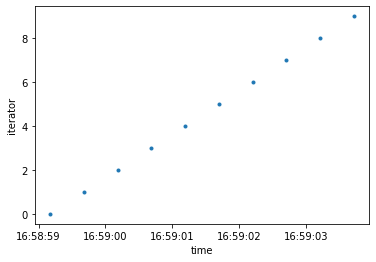

In [18]:
# Importantly, the datetime vector can be plotted in matplotlib.
plt.figure()
plt.plot(dd['time'],dd['iterator'],'.')
plt.xlabel('time'); plt.ylabel('iterator')
plt.show()